In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv")

In [3]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [4]:
df.columns

Index(['Sno', 'Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'],
      dtype='object')

In [5]:
df.shape

(270, 7)

In [6]:
df.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [7]:
df.drop(['Sno'],inplace=True,axis=1)

In [8]:
df_grouped_by_date = df.groupby(by = ["Date"],sort = False).sum()

In [9]:
df_grouped_by_date.shape

(52, 4)

In [10]:
df_grouped_by_date.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [11]:
col_list = list(df_grouped_by_date)
df_grouped_by_date['total_cases'] = df_grouped_by_date[col_list].sum(axis=1)

In [12]:
df_grouped_by_date.tail()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total_cases
Date,,,,,
17/03/20,113,24,14,3,154
18/03/20,126,25,14,3,168
19/03/20,148,25,20,4,197
20/03/20,191,32,23,4,250
21/03/20,244,39,23,4,310


In [13]:
df_grouped_by_date.loc['04/03/20']

ConfirmedIndianNational     12
ConfirmedForeignNational    16
Cured                        3
Deaths                       0
total_cases                 31
Name: 04/03/20, dtype: int64

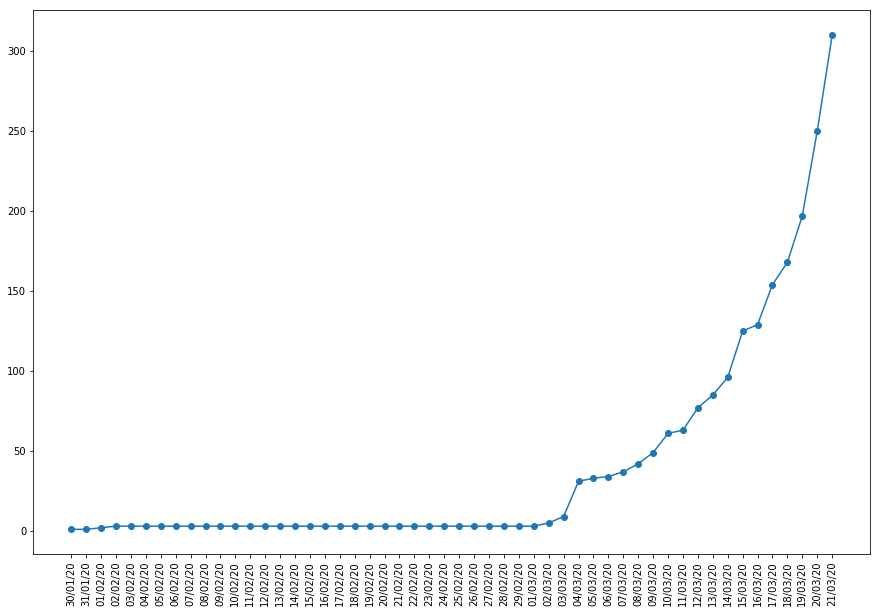

In [17]:
plt.figure(figsize=(15,10))
plt.plot(df_grouped_by_date.index, df_grouped_by_date['total_cases'],marker='o')
plt.xticks(rotation=90)
plt.show()

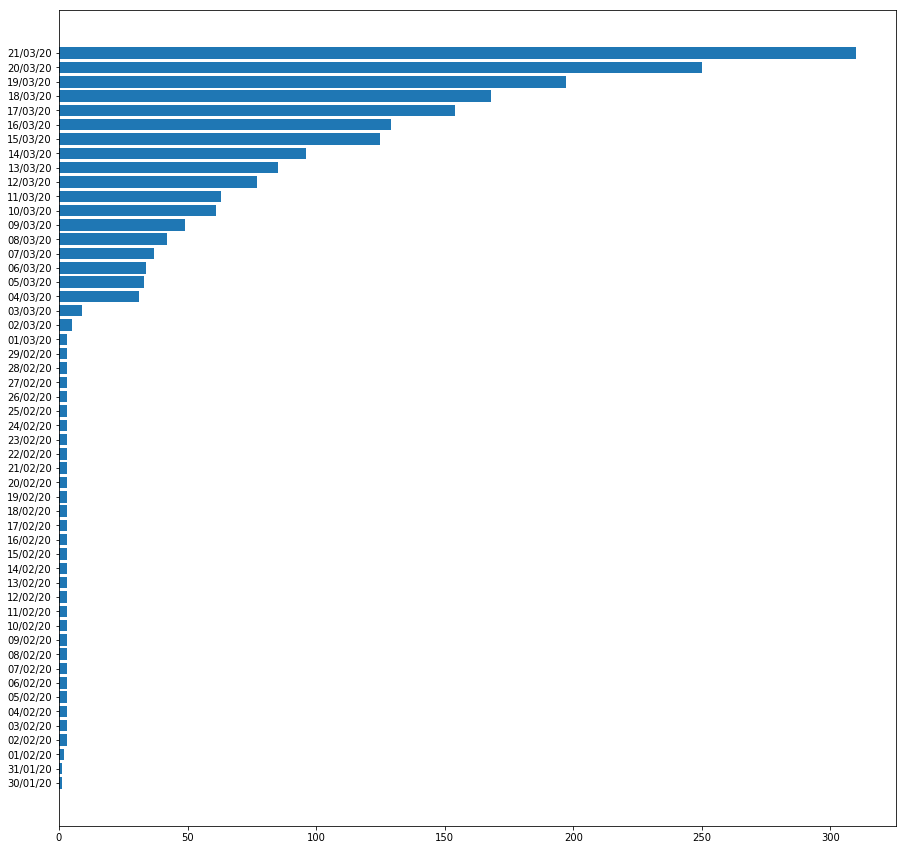

In [18]:
plt.figure(figsize=(15,15))
plt.barh(df_grouped_by_date.index,df_grouped_by_date['total_cases'])
plt.show()

In [19]:
df_grouped_by_date

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total_cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


In [20]:
df_grouped_by_date['total_cases_next_day'] = df_grouped_by_date['total_cases'].shift(-1)

In [28]:
sliced_df = df_grouped_by_date['04/03/20' : '20/03/20']

In [29]:
sliced_df

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total_cases,total_cases_next_day
Date,,,,,,
04/03/20,12,16,3,0,31,33.0
05/03/20,14,16,3,0,33,34.0
06/03/20,15,16,3,0,34,37.0
07/03/20,18,16,3,0,37,42.0
08/03/20,23,16,3,0,42,49.0
09/03/20,30,16,3,0,49,61.0
10/03/20,42,16,3,0,61,63.0
11/03/20,44,16,3,0,63,77.0
12/03/20,57,17,3,0,77,85.0


In [30]:
sliced_df['r'] = (sliced_df['total_cases_next_day'] - sliced_df['total_cases']) / sliced_df['total_cases']

D:\AnacondaandPython\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
sliced_df

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total_cases,total_cases_next_day,r
Date,,,,,,,
04/03/20,12,16,3,0,31,33.0,0.064516
05/03/20,14,16,3,0,33,34.0,0.030303
06/03/20,15,16,3,0,34,37.0,0.088235
07/03/20,18,16,3,0,37,42.0,0.135135
08/03/20,23,16,3,0,42,49.0,0.166667
09/03/20,30,16,3,0,49,61.0,0.244898
10/03/20,42,16,3,0,61,63.0,0.032787
11/03/20,44,16,3,0,63,77.0,0.222222
12/03/20,57,17,3,0,77,85.0,0.103896


In [34]:
r = sliced_df['r'].mean()
r

0.14814803793984233

In [35]:
import math

P_o = 31
t = 26

P_t = P_o * math.exp(r*t)

P_t

1459.4810275382426